In [1]:
%matplotlib notebook

import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist
from utils import normal_distance_eval

## Leader and follower paths

In [ ]:
params = [('20', '15', '10', '075')]#, (cv, cr, basevr, dtoff)]
for cv, cr, basevr, dtoff in params:
    data = pd.read_csv("simulations_records/ft_a2_n1500_cv15_cr10.csv") 
    data['robot_z'] = (data['left_gps_z'] + data['right_gps_z']) / 2
    data['robot_x'] = (data['left_gps_x'] + data['left_gps_x']) / 2

    plt.xlabel('x position [m]')
    plt.ylabel('y position [m]')
    plt.plot(data['subject_z'], data['subject_x'], label='leader', color='g')
    plt.plot(data['robot_z'], data['robot_x'], label='robot', color='navy', linestyle='--')
    plt.legend()
    # plt.savefig('destination_path.eps', format='eps')
    plt.show()

## Normal path deviation

In [ ]:
params = [(10, 15), (15, 10), (15, 5), (15, 15), (5, 20)]

plt.clf()
for cv, cr in params:
    data = pd.read_csv("simulations_records/ft_a2_n1500_cv" + str(cv) + "_cr" + str(cr) + ".csv") 
    data['robot_z'] = (data['left_gps_z'] + data['right_gps_z']) / 2
    data['robot_x'] = (data['left_gps_x'] + data['left_gps_x']) / 2

    rz = np.array(data['robot_z'])
    rx = np.array(data['robot_x'])
    robot_coords = np.array(list(zip(rz, rx)))

    lz = np.array(data['subject_z'])
    lx = np.array(data['subject_x'])
    leader_coords = np.array(list(zip(lz, lx)))

    leader_path_cum_length = [0]

    for i in range(1, len(leader_coords)):
        dist = np.linalg.norm(leader_coords[i] - leader_coords[i-1])
        leader_path_cum_length.append(leader_path_cum_length[i-1] + dist)

    robot_dist_to_leader_path = normal_distance_eval(robot_coords, leader_coords)
    distance_score = np.trapz(robot_dist_to_leader_path, leader_path_cum_length)

    plt.plot(leader_path_cum_length, robot_dist_to_leader_path, label='cv=' + str(cv) + ', cα=' + str(cr))
    plt.ylabel('normal path deviation [m]')
    plt.xlabel('leader distance along path [m]')
    plt.xlim((0, 12.15))
    plt.legend()
    print(cv, cr)
    print('Max distance to leader:', np.max(robot_dist_to_leader_path[200:]))
    print('Total distance to leader:', distance_score)
    
# plt.savefig('ft_npd_comparison.eps', format='eps')

In [ ]:
files = [('ft_a2_n1500_cv15_cr10.csv', 'Follow and Turn'), ('rg_a2_n1500_cv20_cr20_bv10_dtoff10.csv', 'Rotate and Go')]
for f_name, label in files:
    data = pd.read_csv("simulations_records/" + f_name) 
    data['robot_z'] = (data['left_gps_z'] + data['right_gps_z']) / 2
    data['robot_x'] = (data['left_gps_x'] + data['left_gps_x']) / 2

    rz = np.array(data['robot_z'])
    rx = np.array(data['robot_x'])
    robot_coords = np.array(list(zip(rz, rx)))

    lz = np.array(data['subject_z'])
    lx = np.array(data['subject_x'])
    leader_coords = np.array(list(zip(lz, lx)))

    leader_path_cum_length = [0]

    for i in range(1, len(leader_coords)):
        dist = np.linalg.norm(leader_coords[i] - leader_coords[i-1])
        leader_path_cum_length.append(leader_path_cum_length[i-1] + dist)

    robot_dist_to_leader_path = normal_distance_eval(robot_coords, leader_coords)
    distance_score = np.trapz(robot_dist_to_leader_path, leader_path_cum_length)

    plt.plot(leader_path_cum_length, robot_dist_to_leader_path, label=label)
    plt.ylabel('normal path deviation [m]')
    plt.xlabel('leader distance along path [m]')
    plt.xlim((0, 12.15))
    plt.legend()
    print('Total distance to leader:', distance_score)
    
plt.savefig('ft_vs_rg_npd.eps', format='eps')
plt.show()

In [ ]:
data['time'].head()

## Leader/Robot speed
Calculate and compare the speed of the leader and the robot over time

<IPython.core.display.Javascript object>


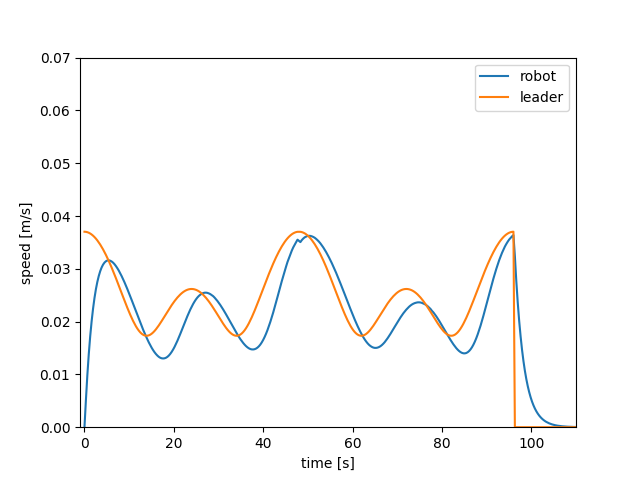

In [21]:
TIME_STEPS = 5
TIME_INTERVAL = 0.064 * TIME_STEPS # seconds

data = pd.read_csv('simulations_records/ft_a2_n1500_cv15_cr10.csv') 
data['robot_z'] = (data['left_gps_z'] + data['right_gps_z']) / 2
data['robot_x'] = (data['left_gps_x'] + data['left_gps_x']) / 2

rz = np.array(data['robot_z'])
rx = np.array(data['robot_x'])
robot_coords = np.array(list(zip(rz, rx)))

lz = np.array(data['subject_z'])
lx = np.array(data['subject_x'])
leader_coords = np.array(list(zip(lz, lx)))

vs_robot = []
vs_leader = []
for i in np.arange(1, len(leader_coords), TIME_STEPS):
    r_dist = np.linalg.norm(robot_coords[i] - robot_coords[i-1])
    l_dist = np.linalg.norm(leader_coords[i] - leader_coords[i-1])
    vs_robot.append(r_dist/TIME_INTERVAL)
    vs_leader.append(l_dist/TIME_INTERVAL)

# Fill gap left by a bug in the simulation
vs_leader[150] = (vs_leader[149] + vs_leader[151]) / 2
vs_robot[150] = (vs_robot[149] + vs_robot[151]) / 2

v_len = len(vs_robot)
plt.plot(np.arange(0.0, TIME_INTERVAL * v_len, TIME_INTERVAL), vs_robot, label='robot')
plt.plot(np.arange(0.0, TIME_INTERVAL * v_len, TIME_INTERVAL), vs_leader, label='leader')
plt.legend()
plt.ylim((0, 0.07))
plt.xlim((-1, 110))
plt.xlabel('time [s]')
plt.ylabel('speed [m/s]')
# plt.savefig('ft_cv15_cr10_leader_robot_speed.eps', format='eps')
plt.show()

In [ ]:
np.arange(0.0, TIME_INTERVAL * v_len, TIME_INTERVAL)

In [6]:
vs_leader

[0.037023753809909209,
 0.03699939968221632,
 0.036934519094608174,
 0.036829286013864468,
 0.036683983436527033,
 0.036499003828163255,
 0.03627484975084156,
 0.036012134697780245,
 0.035711584159811918,
 0.035374036954314562,
 0.035000446853520731,
 0.034591884555750962,
 0.034149540049994487,
 0.033674725431265769,
 0.033168878231170366,
 0.032633565334605437,
 0.03207048755912581,
 0.031481484977116926,
 0.030868543061483636,
 0.030233799731013949,
 0.029579553359394068,
 0.028908271788191435,
 0.028222602343985249,
 0.027525382796303621,
 0.026819653097083122,
 0.026108667602816691,
 0.025395907283409156,
 0.024685091151663712,
 0.023980185788554015,
 0.023285411379824809,
 0.022605242116612037,
 0.021944398164524571,
 0.021307825724087768,
 0.020700661096421737,
 0.020128174307298144,
 0.019595687986921215,
 0.019108468170316185,
 0.018671585795322236,
 0.018289751131590516,
 0.017967128077251607,
 0.017707140637099827,
 0.01751228882506568,
 0.017383994203380087,
 0.017322494836

In [8]:
for i, d in enumerate(vs_leader):
    if d == 8.838834759973514e-06:
        print(i)

150


In [9]:
len(vs_leader)

371